<a href="https://colab.research.google.com/github/simseoyoung/Deep-Learning/blob/main/CH.1/Multiple%20Linear%20Regression(%2BScaler).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multi Variable Linier Regression 실습

- data set : marketing.csv
  
  -> 변수 4개 (youtube, facebook, newspaper, sales)

In [21]:
import torch
import torch.nn as nn
import torch.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.utils.data as data_utils


import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt

In [7]:
# 파일 불러오기
train_data_url = "/content/drive/MyDrive/DL 실습/marketing.csv"
df = pd.read_csv(train_data_url)
print (df.shape) # 파일 형식 확인
df

(200, 4)


,youtube,facebook,newspaper,sales
0,276.12,45.36,83.04,26.52
1,53.40,47.16,54.12,12.48
2,20.64,55.08,83.16,11.16
3,181.80,49.56,70.20,22.20
4,216.96,12.96,70.08,15.48
...,...,...,...,...
195,45.84,4.44,16.56,9.12
196,113.04,5.88,9.72,11.64
197,212.40,11.16,7.68,15.36
198,340.32,50.40,79.44,30.60


[1] Data processing

In [11]:
# X 값 지정 (youtube, facebook, newspaper)
x = df.drop(['sales'],axis = 1)

# y 값 지정 (매출액)
y = df['sales']

print(x.shape)
print(y.shape)

# train, test data 나누기
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1234)

#학습 데이터
print("x_train의 크기: ",x_train.shape)
print("y_train의 크기: ",y_train.shape,'\n')

#테스트 데이터 
print("x_test의 크기: ",x_test.shape)
print("y_test의 크기: ",y_test.shape)
print(type(y_train)) # pandas series data이므로 tensor로 바꿀 때 value 사용

(200, 3)
(200,)
x_train의 크기:  (160, 3)
y_train의 크기:  (160,) 

x_test의 크기:  (40, 3)
y_test의 크기:  (40,)
<class 'pandas.core.series.Series'>


- Scaler 종류 다르게 적용해보기

1) Standard Scaler : 평균과 표준편차를 이용한 것으로 평균을 제거하고 단위분산으로 조정함 (이상치가 있을 경우 영향을 크게 미침)

2) MinMax Scaler : 최대/최소값이 각각 1, 0이 되도록함 (이상치가 있을 경우 다른 값들의 범위가 매우 좁아질 수 있음)

3) MaxAbs Scaler : 절대값이 0~1 사이에 있도록 조정함 (전부 양수일 경우 MinMax Scaler오 동일하게 동작)

4) Robust Scaler : 중앙값과 IQR을 사용함 (이상치의 영향을 최소화함)

In [27]:
#학습 데이터 Scaling
#scaler = StandardScaler()
#scaler = MinMaxScaler()
scaler = RobustScaler()
scaler.fit(x_train)
x_train_scale =  scaler.transform(x_train) 

#테스트 데이터 Scaling
x_test_scale = scaler.transform(x_test)    


# Array-->Tensor
x_train_tensor = torch.FloatTensor(x_train_scale)
y_train_tensor = torch.FloatTensor(y_train.values)

x_test_tensor = torch.FloatTensor(x_test_scale)
y_test_tensor = torch.FloatTensor(y_test.values)

In [28]:
#학습 데이터 배치화 시키기 
train_data =  data_utils.TensorDataset(x_train_tensor, y_train_tensor)

dataloader =  data_utils.DataLoader(train_data, batch_size=100, shuffle= True, drop_last= True )


#배치화된 데이터 확인
for batch_idx, datas in enumerate(dataloader):
    
    print(batch_idx)
    print(datas[0].shape)  # x_train 
    print(datas[1].shape) # y_train
    break

0
torch.Size([100, 3])
torch.Size([100])


[2] Model

In [29]:
#Parameter 정의
input_size = 3
output_size = 1
learning_rate = 0.1
n_epochs = 250

model = torch.nn.Linear(input_size, output_size)

#loss 함수 정의
criterion = torch.nn.MSELoss()

#Optimizer 생성
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)

[3] Training

In [30]:
train_loss = []
test_loss = []

for epoch in range(n_epochs+1):
    
    for idx, (x_batch, y_batch) in enumerate(dataloader):
        #Batch 학습
        model.train()
        optimizer.zero_grad()
        
        y_pred = model(x_batch)
        y_pred = y_pred.reshape(-1)
        
        loss_train = criterion(y_pred, y_batch)
        
        loss_train.backward()
        optimizer.step()

        
        #Validation
        model.eval()
        y_test_pred = model(x_test_tensor)
        
        y_test_pred = y_test_pred.reshape(-1)
        
        loss_test = criterion(y_test_pred, y_test_tensor)
        
        
        
   
    train_loss.append(loss_train.item())
    test_loss.append(loss_test.item())
    print("epoch:{}, Loss_train:{:.2f}, Loss_test:{:.2f}".format( epoch, train_loss[-1], test_loss[-1]))

epoch:0, Loss_train:342.85, Loss_test:220.99
epoch:1, Loss_train:211.95, Loss_test:149.49
epoch:2, Loss_train:138.76, Loss_test:104.68
epoch:3, Loss_train:104.96, Loss_test:72.61
epoch:4, Loss_train:68.28, Loss_test:53.41
epoch:5, Loss_train:52.34, Loss_test:39.96
epoch:6, Loss_train:38.51, Loss_test:30.68
epoch:7, Loss_train:34.69, Loss_test:23.87
epoch:8, Loss_train:21.62, Loss_test:20.18
epoch:9, Loss_train:22.35, Loss_test:16.48
epoch:10, Loss_train:17.37, Loss_test:14.05
epoch:11, Loss_train:13.29, Loss_test:12.37
epoch:12, Loss_train:11.11, Loss_test:11.13
epoch:13, Loss_train:9.51, Loss_test:10.27
epoch:14, Loss_train:11.62, Loss_test:9.31
epoch:15, Loss_train:10.15, Loss_test:8.59
epoch:16, Loss_train:8.12, Loss_test:8.06
epoch:17, Loss_train:8.67, Loss_test:7.59
epoch:18, Loss_train:7.91, Loss_test:7.11
epoch:19, Loss_train:6.72, Loss_test:6.71
epoch:20, Loss_train:6.03, Loss_test:6.42
epoch:21, Loss_train:5.08, Loss_test:6.18
epoch:22, Loss_train:6.60, Loss_test:5.94
epoch:23

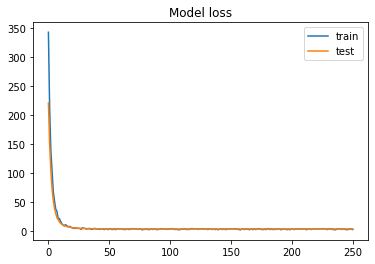

In [31]:
# Loss 값 plot

plt.figure()
plt.plot(train_loss, label='train')
plt.plot(test_loss, label='test')
plt.title('Model loss')
plt.legend(loc= 'upper right')
plt.show()